In [2]:
%pip install pyreadstat

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from pathlib import Path
import pyreadstat
import src

project_dir = Path(src.__file__).parents[1]
data_dir = project_dir / 'data'



df, metadata = pyreadstat.pyreadstat.read_sav(
    filename_path=f'{data_dir}/external/archiwum_danych_spolecznych/P0053SAV.sav',
    encoding='cp1250')

In [4]:
for col_name in metadata.column_labels:
    print(col_name)

Numer kolejny rekordu
Rok badania PGSS
Waga analityczna
Wagi dla balotów A i B  (tylko 2002 r.)
Podpróby losowe PGSS: A/B
Podpróby losowe A-B + rok PGSS
Wersje pytań kwestionariuszy: X/Y
Moduły międzynarodowe ISSP
Suplementy tematyczne PGSS/rok
Województwo zamieszkania (49 województw)
Województwo zamieszkania (16 woj. od 1999 r.)
Region zamieszkania (8 regionów)
6 regionów GUS (wg 16 województw)
Wielkość miejscowości zamieszkania
Miasta 100 tys+ mieszkańców (od 1999 r.)
Liczba osób w gospodarstwie domowym
L.osób w gosp domowym do 6 lat
L.osób w gosp domowym 6-12 lat
L.osób w gosp domowym 13-17 lat
L.osób dorosłych w gosp dom 18+lat
Wydatki na badania naukowe
Wydatki na ochronę środowiska
Wydatki na ochronę zdrowia
Wydatki na walkę z przestępczością
Wydatki na walkę z narkomanią
Wydatki na szkolnictwo
Wydatki na wojsko i obronność
Wydatki na pomoc dla ludzi ubogich
Czy lubi Japonię
Czy lubi Niemcy
Czy lubi USA
Czy lubi Anglię
Czy lubi Izrael
Czy lubi Czechy
Czy lubi Słowację
Czy lubi Cz

In [5]:
for i, col_name in enumerate(df.columns):    
    label = metadata.column_labels[i]
    df[label] = df[col_name]
    df.drop(columns=[col_name], inplace=True)
year_column = 'Rok badania PGSS'
df[year_column] = df[year_column].astype(int).astype(str)

In [6]:
def find_values_for_column(look_for):
    return metadata.variable_value_labels[next(col for col in metadata.column_names if metadata.column_names_to_labels[col] == look_for)]


In [7]:
respondent_profession = 'Zawód resp: klasyfikacja ISCO 1988'
medicine_related_jobs = [
'Specjaliści ochrony zdrowia',
'Lekarze medycyny',
'Lekarze dentyści',
'Lekarze weterynarze',
'Farmaceuci',
'Specjaliści ochrony zdrowia, kultury fizycznej gdzie indziej nie sklasyfikowani',
'Specjaliści pielęgniarstwa, dyplomowane pielęgniarki i położne',
'Operatorzy aparatury medycznej',
'Średni personel ochrony zdrowia (z wyjątkiem pielęgniarek)',
'Pomocniczy personel medyczny, ratownicy medyczni (z wyjątkiem pielęgniarek)',
'Higieniści',
'Dietetycy i żywieniowcy',
'Optycy i protetycy',
'Asystenci i technicy dentystyczni',
'Fizykoterapeuci i pokrewni',
'Asystenci weterynaryjni',
'Technicy farmaceutyczni',
'Inni specjaliści średniego szczebla w lecznictwie nie sklasyfikowani gdzie indziej (z wyjątkiem pielęgniarek)',
'Pielęgniarki i położne',
'Pielęgniarki',
'Położne',
'Praktykujący tradycyjne metody leczenia i uzdrawiacze',
'Osoby leczące tradycyjnymi metodami',
'Znachorzy i uzdrawiacze',
'Pomocniczy personel medyczny',
]

df[respondent_profession] = df[respondent_profession].map(find_values_for_column(respondent_profession))

In [8]:
find_values_for_column('Resp: klasyf gosp narod /GUS 86/ 25 kat')

{-9.0: 'BRAK DANYCH',
 -2.0: 'ND:PYT NIE ZADANE',
 -1.0: 'ND:NIGDY NIE PRACOWAŁ',
 1.0: 'PRZEM PAL-ENERGETYCZNY',
 2.0: 'PRZEM METALURGICZNY',
 3.0: 'PRZEM ELEKTROMASZYNOWY',
 4.0: 'PRZEM CHEMICZNY',
 5.0: 'PRZEM MINERALNY',
 6.0: 'PRZEM DRZEWNO-PAPIERNICZY',
 7.0: 'PRZEM LEKKI',
 8.0: 'PRZEM SPOŻYWCZY',
 9.0: 'PRZEM: POZOSTAŁE GAŁĘZIE',
 10.0: 'BUDOWNICTWO',
 11.0: 'GOSPOD ROLNICZA',
 12.0: 'LEŚNICTWO',
 13.0: 'TRANSPORT',
 14.0: 'ŁĄCZNOŚĆ',
 15.0: 'HANDEL',
 16.0: 'GOSP KOMUNALNA',
 17.0: 'GOSP MIESZK/USŁUGI NIEMATERIALNE',
 18.0: 'NAUKA, ROZWÓJ TECHNIKI',
 19.0: 'OŚWIATA I WYCHOWANIE',
 20.0: 'KULTURA I SZTUKA',
 21.0: 'OCH ZDROWIA, OPIEKA SPOŁECZNA',
 22.0: 'KUL FIZ,TURYSTYKA,WYPOCZYNEK',
 23.0: 'ADM PAŃSTW, WYM SPRAWIEDLIWOŚCI',
 24.0: 'FINANSE I UBEZPIECZENIA',
 25.0: 'ORGANIZACJE SPOŁ,POLIT,ZWIĄZKOWE',
 98.0: 'NIE WIEM'}

# Analiza okresu życia lekarza przed studiami medycznymi
Celem jest zobaczyć jaki background mają osoby które wybrały dla siebie jako cel pomagać innym ludziom.
Między innymi powinniśmy ocenić:
* czy rodzina była pełna,
* jaki zawód miały rodzice takiego dziecka,
* jakie wykształcenie miały rodzice,
* dochody rodziny.

W tym module, należało by również porównać populację lekarzy z resztą społeczeństwa, żeby bias który mógł się pojawić wśród respondentów. (np. sytuacja w której wszyscy respondenci będą mieli rodziców z wykształceniem wyższym, co może wynikać z tego, że ludzie edukowani bardziej skłonni ku braniu udziału w sondażach. Wtedy waga tej zmiennej w populacji naszych lekarzy była by zerowa, ponieważ zmienna jest zbiasowana)


In [9]:
target_columns = [
    year_column,
    respondent_profession,
    "14L: Mieszkał z macochą", 
    "14L: Mieszkał z ojczymem", 
    "14L: Mieszkał z siostrą/ami", 
    "14L: Mieszkał z bratem/ćmi", 
    "14L: Mieszkał z babcią", 
    "14L: Mieszkał z dziadkiem", 
    "14L: Mieszkał z ciotką", 
    "14L: Mieszkał z wujem", 
    "14L: Z innymi krewnymi", 
    "14L: Z osobami spoza rodziny", 
    "14L: Mieszkał w domu dziecka", 
    "14L: Kto utrzymywał rodzinę #1", 
    "14L: Kto utrzymywał rodzinę #2", 
    "14L: Dlaczego rodzina niepełna", 
    "14L: Struktura rodziny", 
    "Liczba braci i sióstr", 
    "Liczba starszych braci i sióstr", 
    "Zawód ojca: klasyfikacja ISCO 1988", 
    "Zawód ojca: klasyf ISCO 1988 /9 kat", 
    "Zawód ojca: klasyf ISCO 1988 /27 kat", 
    "Ojciec: skala poz ekon zawodu, Treiman 96", 
    "Ojciec: skala prestiżu zawodu, Treiman 96", 
    "Ojciec kieruje/-wał pracą innych osób", 
    "Poziom wykształcenia ojca", 
    "Poziom wykształcenia ojca (od 2002r.)", 
    "Lat nauki szkolnej ojca", 
    "Zawód matki: klasyfikacja ISCO 1988", 
    "Zawód matki: klasyf ISCO 1988 /9 kat", 
    "Zawód matki: klasyf ISCO 1988 /27 kat", 
    "Matka: skala poz ekon zaw, Treiman 96", 
    "Matka: skala prestiżu zawodu, Treiman 96", 
    "Matka rolnikiem: liczba hektarów", 
    "Matka właścicielem/prac najemnym", 
    "Poziom wykształcenia matki", 
    "Poziom wykształcenia matki(od 2002r.)", 
    "Lat nauki szkolnej matki", 
    "Wykształcenie matki: typ szkoły", 
    "Ocena dochodów rodziny gdy resp 14 lat",
]

# Ojciec właścicielem/prac najemnym #2
# Praca matki do 14 roku życia resp
# Matka: skala prestiżu zawodu, Treiman 96
# 14L: Mieszkał z matką
# R dzieckiem: matka uczest w mszach/nabożeństwach
# Ocena dochodów rodziny gdy resp 14 lat



is_doctor = lambda df: df[respondent_profession].isin(medicine_related_jobs)
module_df = df[is_doctor(df)][target_columns]
for col in module_df:
    if col not in [year_column,respondent_profession]:
        module_df[col] = module_df[col].map(find_values_for_column(col))


'BRAK DANYCH,Zn niższe niż przeciętne,Nieco niższe niż przeciętne,Przeciętne,Nieco wyższe niż przeciętne,Zn wyższe niż przeciętne,NIE WIEM,BRAK DANYCH'

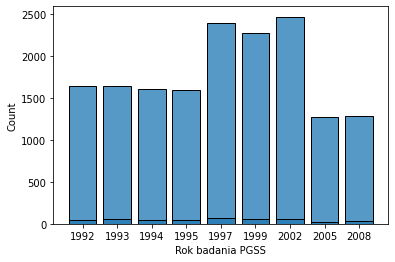

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
for data in [df, module_df]:
    sns.histplot(data, x=year_column, discrete=True, shrink=.8)


<AxesSubplot:xlabel='Rok badania PGSS', ylabel='Count'>

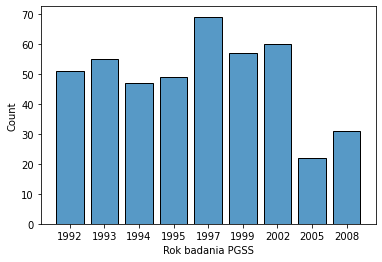

In [11]:
# Number of doctors with full family in distribution
sns.histplot(module_df, x=year_column, shrink=.8)

<AxesSubplot:xlabel='Rok badania PGSS', ylabel='Count'>

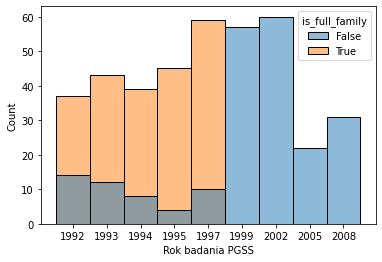

In [12]:
def is_full_family(entry):
    return entry['14L: Struktura rodziny'] == 'Z MATKA I OJCEM'

family_column = 'is_full_family'
module_df[family_column] = module_df.apply(is_full_family, 'columns')
sns.histplot(module_df, x=year_column, hue=family_column)

In [13]:
module_df.shape

(441, 41)

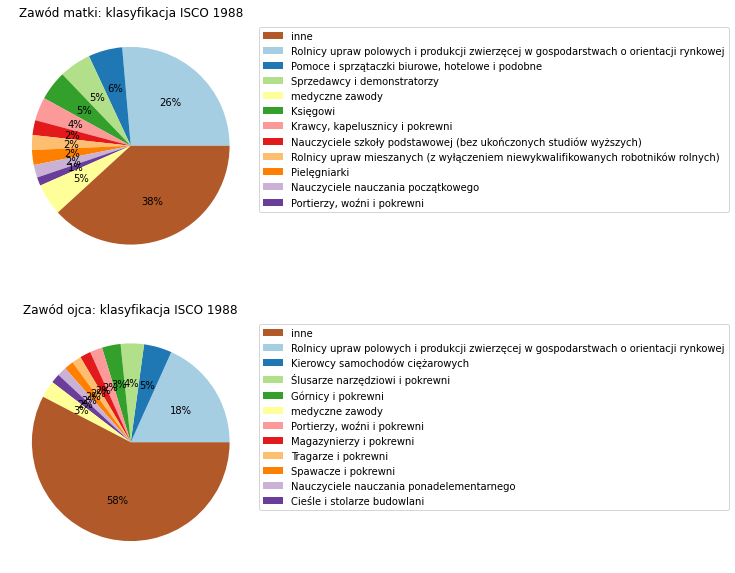

In [14]:
def draw_profession_pie_chart(df, column, n_professions, axs, title=None):
    professions = df.groupby(column)[year_column].count().sort_values(ascending=False)
    if n_professions == -1:
        n_professions = professions.shape[0]
    top_professions = professions[:n_professions]
    professions = professions[n_professions:]
    values = [*top_professions.values]
    labels=[*top_professions.keys()]
    medical_professionals_sum = professions.loc[professions.index.intersection(medicine_related_jobs)].sum()
    if medical_professionals_sum > 0:
        values.append(medical_professionals_sum)
        labels.append('medyczne zawody')
    
    other_professions = professions.sum() - medical_professionals_sum
    if other_professions > 0:
        values.append(other_professions)
        labels.append('inne')
    colors = sns.color_palette('Paired')[:(n_professions+2)]
    patches, *_ = axs.pie(values, colors = colors, autopct='%.0f%%', radius=1)
    patches, labels, _ = zip(*sorted(zip(
        patches, labels, values
    ), key=lambda t: t[2], reverse=True))
    axs.legend(patches, labels, loc='upper left', bbox_to_anchor=(1, 1))
    axs.set_title(title or column)



n_professions = 10
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
mother_profession = 'Zawód matki: klasyfikacja ISCO 1988'
father_profession = 'Zawód ojca: klasyfikacja ISCO 1988'
draw_profession_pie_chart(module_df, mother_profession, n_professions, axs[0])
draw_profession_pie_chart(module_df, father_profession, n_professions, axs[1])


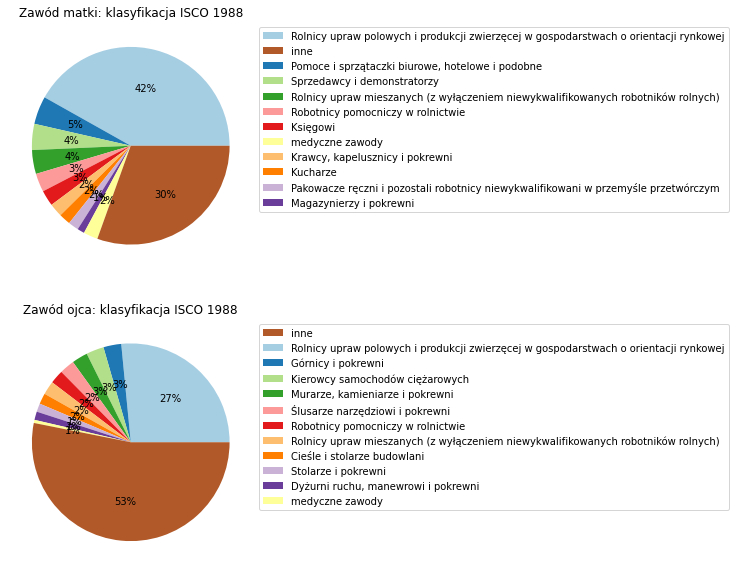

In [15]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

df[mother_profession] = df[mother_profession].map(find_values_for_column(mother_profession))
df[father_profession] = df[father_profession].map(find_values_for_column(father_profession))
draw_profession_pie_chart(df, mother_profession, n_professions, axs[0])
draw_profession_pie_chart(df, father_profession, n_professions, axs[1])



In [16]:
def is_parents_from_med(row):
    return row[mother_profession] in medicine_related_jobs or row[father_profession]  in medicine_related_jobs


doctors_with_parents_from_med = module_df[module_df.apply(is_parents_from_med, 'columns')]
doctors_with_parents_from_other_bg = module_df[module_df.apply(lambda r: not is_parents_from_med(r), 'columns')]

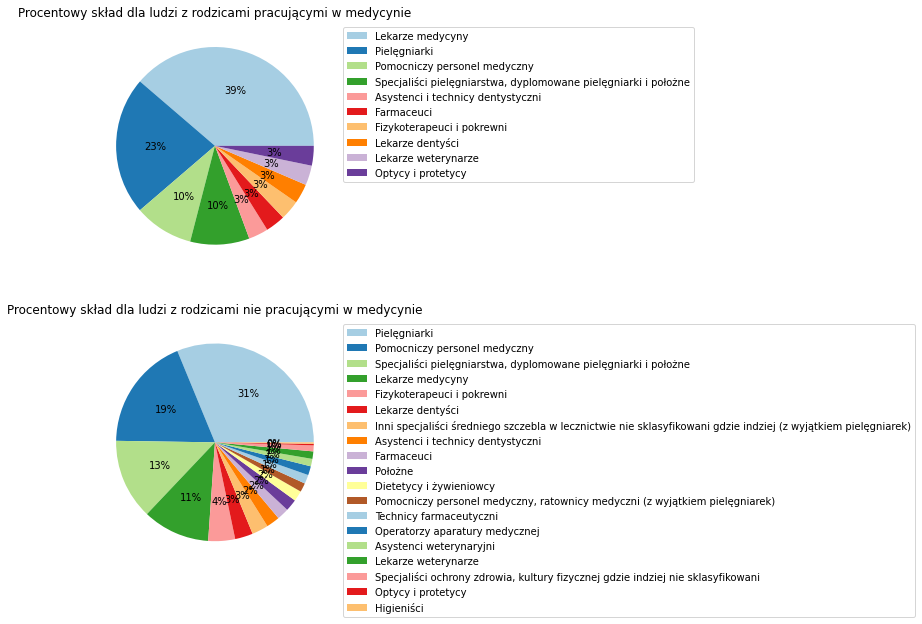

In [17]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
draw_profession_pie_chart(doctors_with_parents_from_med, respondent_profession, -1, axs[0], 'Procentowy skład dla ludzi z rodzicami pracującymi w medycynie')
draw_profession_pie_chart(doctors_with_parents_from_other_bg, respondent_profession, -1, axs[1], 'Procentowy skład dla ludzi z rodzicami nie pracującymi w medycynie')


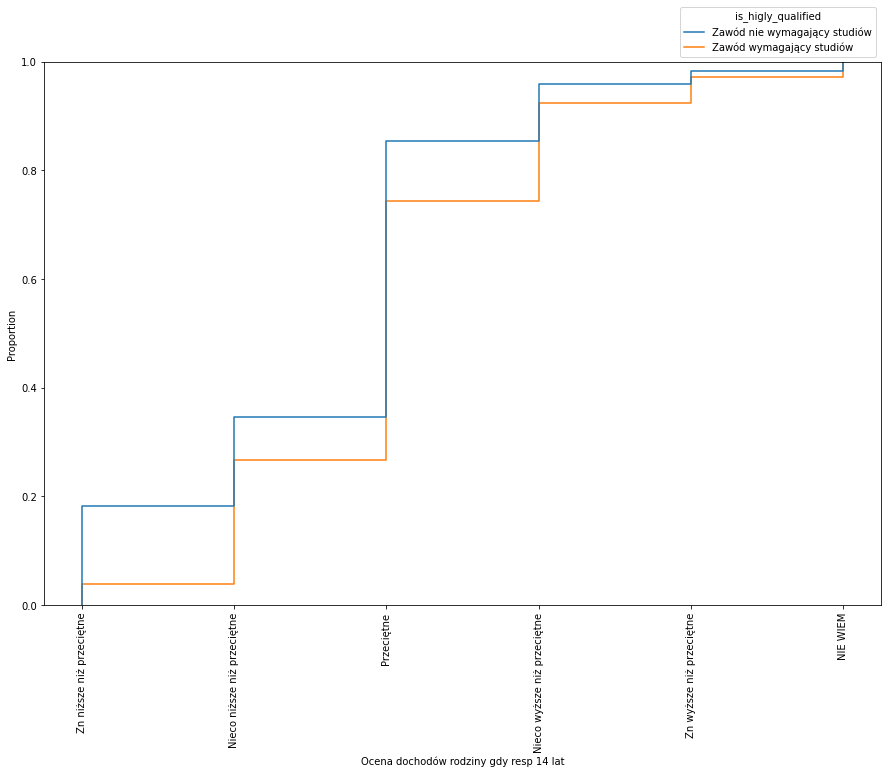

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
family_income = "Ocena dochodów rodziny gdy resp 14 lat"
module_df[family_income] = pd.Categorical(module_df[family_income], list(find_values_for_column(family_income).values())[:-1])

def is_higly_qualified_profession(row):
    is_higly_qualified = row[respondent_profession] in ['Lekarze medycyny', 'Lekarze dentyści', 'Dietetycy i żywieniowcy', 'Fizykoterapeuci i pokrewni', 'Farmaceuci']
    return 'Zawód wymagający studiów' if is_higly_qualified else 'Zawód nie wymagający studiów'

module_df['is_higly_qualified'] = module_df.apply(is_higly_qualified_profession, 'columns')
p = sns.ecdfplot(module_df, x=family_income, hue='is_higly_qualified', ax=ax, complementary=False)
sns.move_legend(p, "lower right", bbox_to_anchor=(1, 1))
ax.tick_params(axis='x', rotation=90)

Wnioski:

1. Zawód rodziców nie ma wpływu na to, czy ktoś podejmie studia lekarskie czy nie

2. W przypadku jeśli rodzice kogoś mieli zawód powiązany z medycyną jest wysoka szansa tego, że osoba zostanie lekarzeem, a nie będzie pracować na innym stanowisku medycznym

3. Poniżej 40% pracowników medycznych pochodzi z rodzin które miały dochód mniejszy niż przeciętny

4. Dochód rodziny nie ma znaczącego wpływu na to czy osoba pójdzie na studia medyczne, czy nie

## Analiza lekarza w okresie po studiach

In [19]:
target_columns = [
    year_column,
    respondent_profession,
    'Stawiam sobie na ogół trudne i ambitne cele',
    'Nieszczęśliwy, w depresji',
    'Zniechęcony, znudzony',
    'Zaangażowanie respondenta w pracy',
    'Woli więcej pracować i wiecej zarabiać',
    'Moja praca jest pewna',
    'Mój dochód jest wysoki',
    'Moje szanse na awans są duże',
    'Moja praca jest interesująca',
    'Mogę pracować niezależnie',
    'Mogę w pracy pomagać innym',
    'Moja praca jest użyteczna dla społeczeństwa',
    'Jak często wraca z pracy wyczerpany',
    'Jak często praca wywołuje stres',
    'Zmieniłby obecny rodzaj pracy na inny',
    'Nie zmieni pracy nawet za wyższą płacę',
    'Jest dumny z rodzaju wykonywanej pracy',
    'Czy obawia się utraty pracy',
]

for col in target_columns:
    if col not in [year_column,respondent_profession]:
        df[col] = df[col].map(find_values_for_column(col))

module_df = df[is_doctor(df)][target_columns]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 441 entries, 11 to 16219
Data columns (total 20 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Rok badania PGSS                             441 non-null    object
 1   Zawód resp: klasyfikacja ISCO 1988           441 non-null    object
 2   Stawiam sobie na ogół trudne i ambitne cele  33 non-null     object
 3   Nieszczęśliwy, w depresji                    33 non-null     object
 4   Zniechęcony, znudzony                        33 non-null     object
 5   Zaangażowanie respondenta w pracy            31 non-null     object
 6   Woli więcej pracować i wiecej zarabiać       31 non-null     object
 7   Moja praca jest pewna                        31 non-null     object
 8   Mój dochód jest wysoki                       31 non-null     object
 9   Moje szanse na awans są duże                 30 non-null     object
 10  Moja praca 

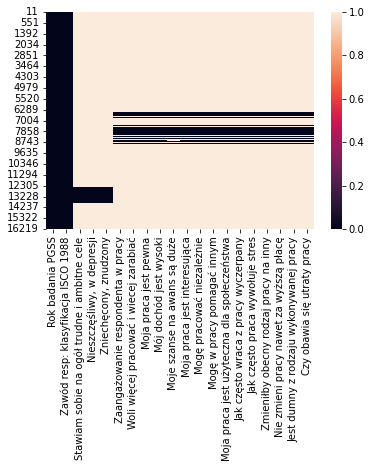

In [20]:
sns.heatmap(module_df.isna())
module_df.info()

In [ ]:
cols = [
'Ojciec właścicielem/prac najemnym #2',
'Praca matki do 14 roku życia resp',
'Matka: skala prestiżu zawodu, Treiman 96',
'14L: Mieszkał z matką',
'R dzieckiem: matka uczest w mszach/nabożeństwach',
'Ocena dochodów rodziny gdy resp 14 lat',
]

module_df = target_df.copy()

# Religia


In [42]:
target_columns = [
    year_column,
    respondent_profession,
    'Sukces: ważna praca czy szczęście',
    'Doch rodziny na tle doch innych rodzin',
    'Matka resp: wyznanie/religia',
    'Ojciec resp: wyznanie/religia',
    'W jakim wyznaniu/religii resp był wychowany',
    'R dzieckiem: matka uczest w mszach/nabożeństwach',
    'R dzieckiem: ojciec uczest w mszach/nabożeństwach',
    'R 11-12 lat: uczest w mszach/nabożeństwach',
]
module_df = df[is_doctor(df)][target_columns]
for col in module_df:
    if col not in [year_column,respondent_profession]:
        module_df[col] = module_df[col].map(find_values_for_column(col))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441 entries, 11 to 16219
Data columns (total 10 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   Rok badania PGSS                                   441 non-null    object
 1   Zawód resp: klasyfikacja ISCO 1988                 441 non-null    object
 2   Sukces: ważna praca czy szczęście                  387 non-null    object
 3   Doch rodziny na tle doch innych rodzin             441 non-null    object
 4   Matka resp: wyznanie/religia                       29 non-null     object
 5   Ojciec resp: wyznanie/religia                      29 non-null     object
 6   W jakim wyznaniu/religii resp był wychowany        29 non-null     object
 7   R dzieckiem: matka uczest w mszach/nabożeństwach   28 non-null     object
 8   R dzieckiem: ojciec uczest w mszach/nabożeństwach  29 non-null     object
 9   R 11-12 lat: uczes

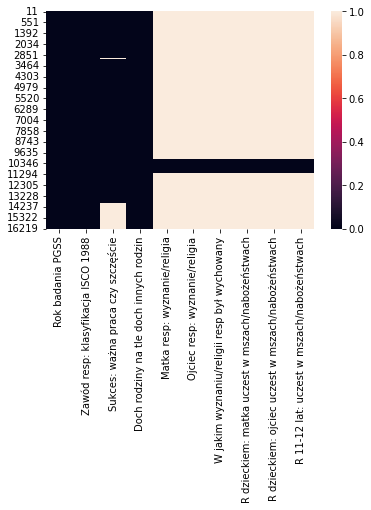

In [29]:
sns.heatmap(module_df.isna())
module_df.info()

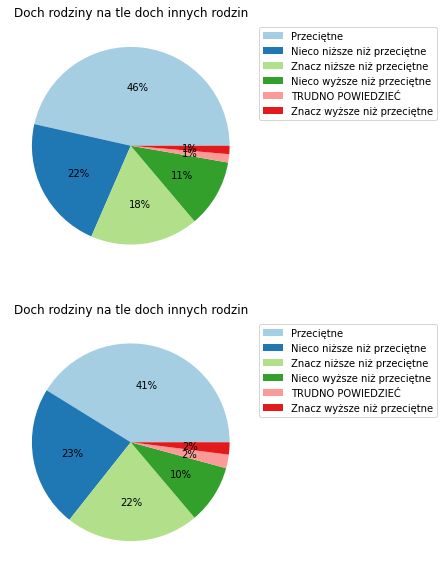

In [43]:
# sns.histplot(module_df, x=year_column, hue='Doch rodziny na tle doch innych rodzin')
# To test dochód -> lekarz

fig, axs = plt.subplots(2,1, figsize=(10, 10))

draw_profession_pie_chart(module_df, 'Doch rodziny na tle doch innych rodzin', -1, axs[0])
draw_profession_pie_chart(df, 'Doch rodziny na tle doch innych rodzin', -1, axs[1])

# Tu coś o podejściu życiowym :) 



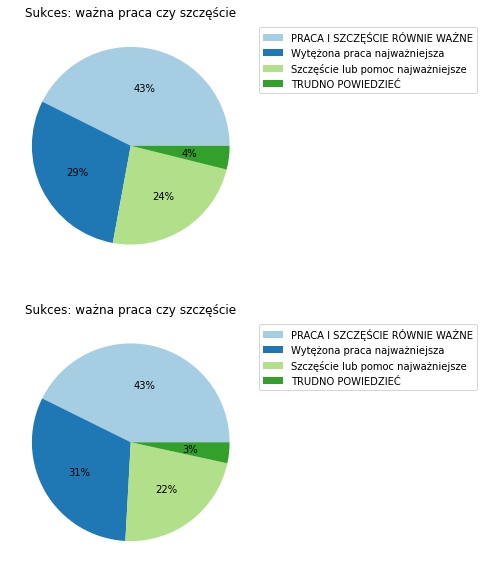

In [44]:
fig, axs = plt.subplots(2,1, figsize=(10, 10))

draw_profession_pie_chart(module_df, 'Sukces: ważna praca czy szczęście', -1, axs[0])
draw_profession_pie_chart(df, 'Sukces: ważna praca czy szczęście', -1, axs[1])

# Sprawdzamy podobieństwo dwóch dystrybucji
I robimy to za pomocą Chi kwadrat.
Jest to test który pozwala sprawdzić podobieństwo dwóch dystrybucji kategorialnych zmiennych. 
Żeby móc wykonać test, dane muszą spełniać następujące założenia:
- zmienne powinny być niezależne
- dla każdej z testowanych zmiennych wartości powinny wykluczać się nawzajem


In [154]:
from scipy import stats

# comparing frequencies in two distributions using chi square test
def compare_two_distribution(df1, df2, col):
    return stats.chisquare(
                (df1[col].value_counts() / df1[col].count()) * 100,
                (df2[col].value_counts() / df2[col].count()) * 100
                ) 

compare_two_distribution(module_df, df, 'Sukces: ważna praca czy szczęście')

Power_divergenceResult(statistic=0.2992200641001127, pvalue=0.9601750984160132)

Jak widzimy, `pvalue` jest wynosi aż 96 procent, co oznacz, że te dwie dystrybucji są podobne


# Korelacje

Chi kwadrat pozwala również na porównanie podobieństwa dwóch zmiennych
- dla każdego połączenia wartości dwóch zmiennych powinno być conajmniej 5 osobników (5, bo czemu nie)
- wartości zmiennych kategorialnych zmiennych wykluczają siebie nawzajem
- testowane grupy są niezależne


In [68]:
# Null hypothesis: variable are independent
# If p value is less than 0.05, than variable affects the decision 

cols_to_check = [
    'Sukces: ważna praca czy szczęście',
    'Zawód ojca: klasyf ISCO 1988 /9 kat',
    'Ojciec kieruje/-wał pracą innych osób',
    'Ocena dochodów rodziny gdy resp 14 lat',
    'Ojciec: skala prestiżu zawodu, Treiman 96',
    "Matka: skala poz ekon zaw, Treiman 96",
    "Zawód matki: klasyf ISCO 1988 /9 kat"
]
threshold = 0.05

for col in cols_to_check:
    _, pvalue, *_ = stats.chi2_contingency(pd.crosstab(df[col], is_doctor(df)))
    if pvalue < threshold:
        print(f'{col} potentially influences person decision')
# Sukces: ważna praca czy szczęście
# Doch rodziny na tle doch innych rodzin
# Matka resp: wyznanie/religia
# Ojciec resp: wyznanie/religia
# W jakim wyznaniu/religii resp był wychowany
# R dzieckiem: matka uczest w mszach/nabożeństwach
# R dzieckiem: ojciec uczest w mszach/nabożeństwach
# R 11-12 lat: uczest w mszach/nabożeństwach
# Ludzie zawsze myślą o swoim interesie.






Zawód ojca: klasyf ISCO 1988 /9 kat potentially influences person decision
Ojciec kieruje/-wał pracą innych osób potentially influences person decision
Ojciec: skala prestiżu zawodu, Treiman 96 potentially influences person decision
Matka: skala poz ekon zaw, Treiman 96 potentially influences person decision
Zawód matki: klasyf ISCO 1988 /9 kat potentially influences person decision


In [79]:
# Check if it is same for other people

influence_only_doctor = {
'Zawód ojca: klasyf ISCO 1988 /9 kat',
'Ojciec kieruje/-wał pracą innych osób',
'Ojciec: skala prestiżu zawodu, Treiman 96',
'Matka: skala poz ekon zaw, Treiman 96',
'Zawód matki: klasyf ISCO 1988 /9 kat',
}
for p in df[respondent_profession].dropna().unique():
    for col in cols_to_check:
        _, pvalue, *_ = stats.chi2_contingency(pd.crosstab(df[col], df[respondent_profession]==p))
        if pvalue < threshold or 1 - threshold < pvalue:
            # print(f'{col} potentially influences person decision to work as a {p}')
            influence_only_doctor = influence_only_doctor - {col}
print(influence_only_doctor)

set()


# Start here

In [168]:
df, metadata = pyreadstat.pyreadstat.read_sav(
    filename_path=f'{data_dir}/external/archiwum_danych_spolecznych/P0053SAV.sav',
    encoding='cp1250')

for i, col_name in enumerate(df.columns):    
    label = metadata.column_labels[i]
    df[label] = df[col_name]
    df.drop(columns=[col_name], inplace=True)
year_column = 'Rok badania PGSS'
df[year_column] = df[year_column].astype(int).astype(str)


In [155]:

target_df = df.copy()
threshold = 0.05
influence_only_doctor = set()
influences_doctor = set()
target_df[respondent_profession] = target_df[respondent_profession].map(find_values_for_column(respondent_profession))
for col in target_df.columns:
    if col in [year_column, respondent_profession, 'Numer kolejny rekordu', 'Waga analityczna', 'Wagi dla balotów A i B  (tylko 2002 r.)']:
        continue
    if target_df[col].count() == 0:
        continue
    mapped_column_values = target_df[col].map(find_values_for_column(col))
    if mapped_column_values.count() != 0:
        target_df[col] = mapped_column_values
    _, pvalue, *_ = stats.chi2_contingency(pd.crosstab(target_df[col], is_doctor(target_df)))
    if  pvalue < threshold:
        # print(f'{col} potentially influences person decision')
        influences_doctor.add(col)
influence_only_doctor = influences_doctor.copy()
for p in target_df[respondent_profession].dropna().unique():
    for col in influence_only_doctor.copy():
        _, pvalue, *_ = stats.chi2_contingency(pd.crosstab(target_df[col], target_df[respondent_profession]==p))
        if pvalue < threshold:
            # print(f'{col} potentially influences person decision to work as a {p}')
            influence_only_doctor = influence_only_doctor - {col}
print(influence_only_doctor)



set()


In [156]:
for c in influences_doctor:
    print(c)

Ojciec resp: wyznanie/religia
ZAUF do rządu /y
Smutny/przygnęb:do kogo w #2-giej kolej
Rządzenie krajem pozostawić mężczyznom
Gorsza pomyłka sądowa
Świat jest sprawiedliwy,każdy otrz to na co zasłużył
L.osób dorosłych w gosp dom 18+lat
Źród doch: emerytury, renty
Obowiązkiem resp: sprzatanie, gotowanie
Resp: Klasyfikacja Gospodarki Narodowej/GUS 1986
Kto wykonuje drobne naprawy
14L: Wielkość miejscowości zamieszkania
Usunąć książkę antyreligijną z biblioteki
Matka: odległość zamieszkania/min-godz
Zagr terr: zatrzym/przeszuk przypadk osoby
Uprawianie sportu rozwija charakter dzieci
Zakłady czy rząd decydują o środowisku
ZAUF do Sądu Najwyższego /x
Brak pieniędzy na kształcenie
Czy obecnie pracuje zarobkowo
Boi się chodzić samotnie nocą
Jak często przekonuje do własnych poglądów
Jak często chodzi do kawiarni /restauracji
Na jakie dochody zasługuje (PLN)
Kob powinna pracować: dzieci w szkole
Pozycja kierownicza resp (indeks)
Udział w 1-turze wyborów prezyd 1990
Antybiotyk zabijaja bakteri

# Analiza dzieciństwa

In [204]:
from scipy import stats

# comparing frequencies in two distributions using chi square test
def compare_two_distribution(df1, df2, col):
    
    df1_freq = (df1[col].value_counts() / df1[col].count()) * 100
    df2_freq = (df2[col].value_counts() / df2[col].count()) * 100
    for row in df2_freq.index:
        if row not in df1_freq:
            df1_freq[row] = 0
    
    return stats.chisquare(
                df1_freq,
                df2_freq
                ) 


14L: Mieszkał na wsi/mieście - 0.4177003110967695
Poziom wykształcenia matki - 0.5252178746282767
Zawód matki: klasyf ISCO 1988 /27 kat - 0.9654313387464984
Matka resp: wyznanie/religia - 1.6511483516304833e-05
Matka właścicielem/prac najemnym - 0.056864117491180435
Wykształcenie matki: typ szkoły - 0.3766050392603877
Zawód ojca: klasyf ISCO 1988 /27 kat - 0.9970534744808649
Ojciec resp: wyznanie/religia - 0.0002451385823308225
Ojciec właścicielem/prac najemnym - 0.15529558015234574
Wykształcenie ojca: typ szkoły - 0.053323074268802485
Pozycja zawodowa ojca gdy resp miał 14 lat - 0.8868604668062058
Zawód resp: klasyfikacja ISCO 1988 - 1.0


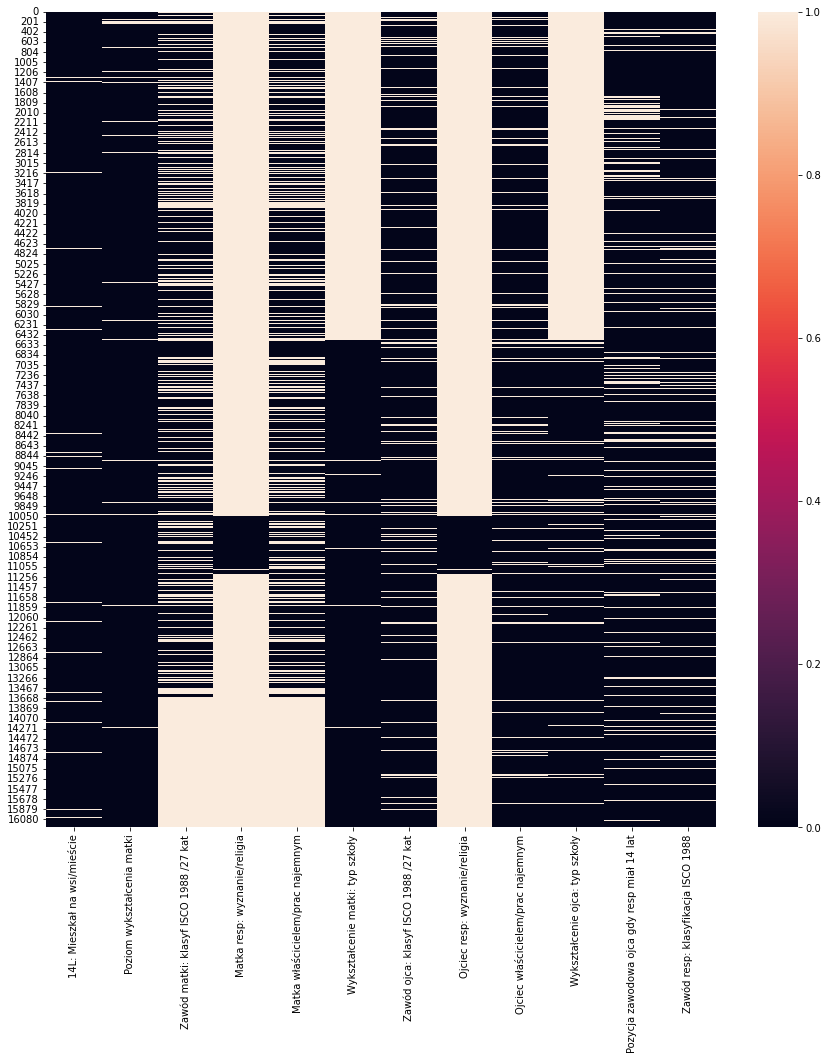

In [224]:
cols = ['14L: Mieszkał na wsi/mieście',
'Poziom wykształcenia matki',
'Zawód matki: klasyf ISCO 1988 /27 kat',
'Matka resp: wyznanie/religia',
'Matka właścicielem/prac najemnym',
'Wykształcenie matki: typ szkoły',
'Zawód ojca: klasyf ISCO 1988 /27 kat',
'Ojciec resp: wyznanie/religia',
'Ojciec właścicielem/prac najemnym',
'Wykształcenie ojca: typ szkoły',
'Pozycja zawodowa ojca gdy resp miał 14 lat',
respondent_profession]


target_df = df.copy()
for col in cols:
    target_df[target_df.loc[df[col].isin(['BRAK DANYCH', "NIE WIEM"])].index] = pd.NA

f, ax = plt.subplots(1, 1,figsize=(15,15))
sns.heatmap(target_df[cols].isna(), ax=ax)

for col in cols:
    target_df[col] = target_df[col].map(find_values_for_column(col))


for col in cols:
    doctors = target_df[is_doctor(target_df)]
    if doctors[col].count() == 0:
        continue
    stat, pvalue = compare_two_distribution(doctors, target_df, col)
    print(f'{col} - {pvalue}')
         




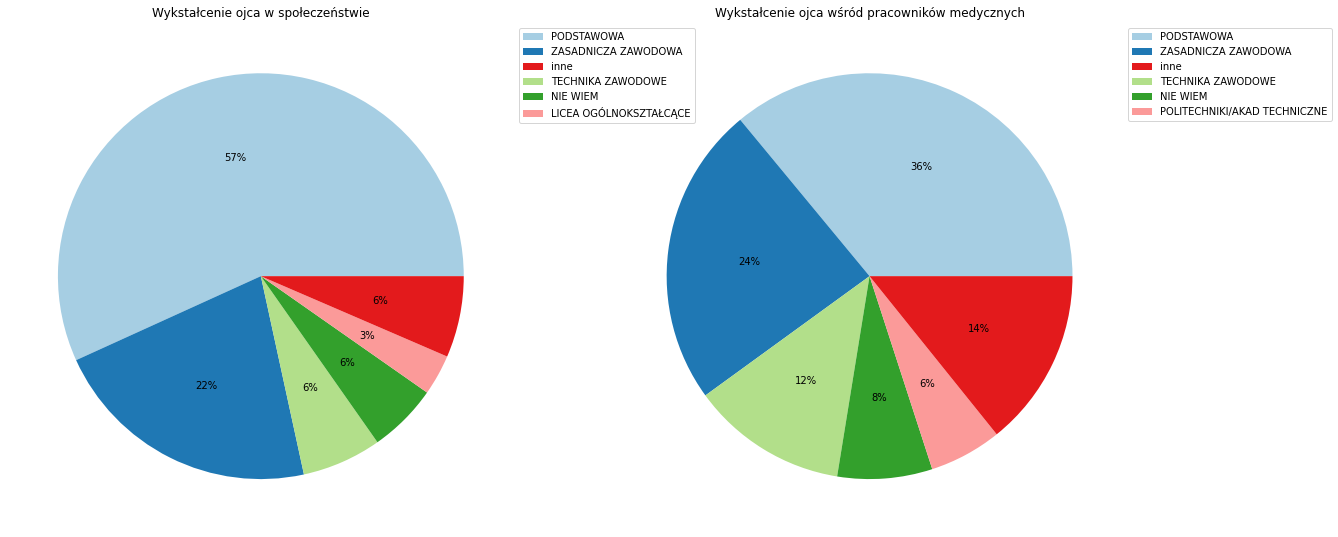

In [226]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
draw_profession_pie_chart(target_df, 'Wykształcenie ojca: typ szkoły', -1, axs=axs[0], title='Wykstałcenie ojca w społeczeństwie')
draw_profession_pie_chart(target_df[is_doctor(target_df)], 'Wykształcenie ojca: typ szkoły', 5, axs=axs[1], title='Wykstałcenie ojca wśród pracowników medycznych')
# draw_profession_pie_chart(target_df, 'Ojciec resp: wyznanie/religia', -1, axs=axs[1])b

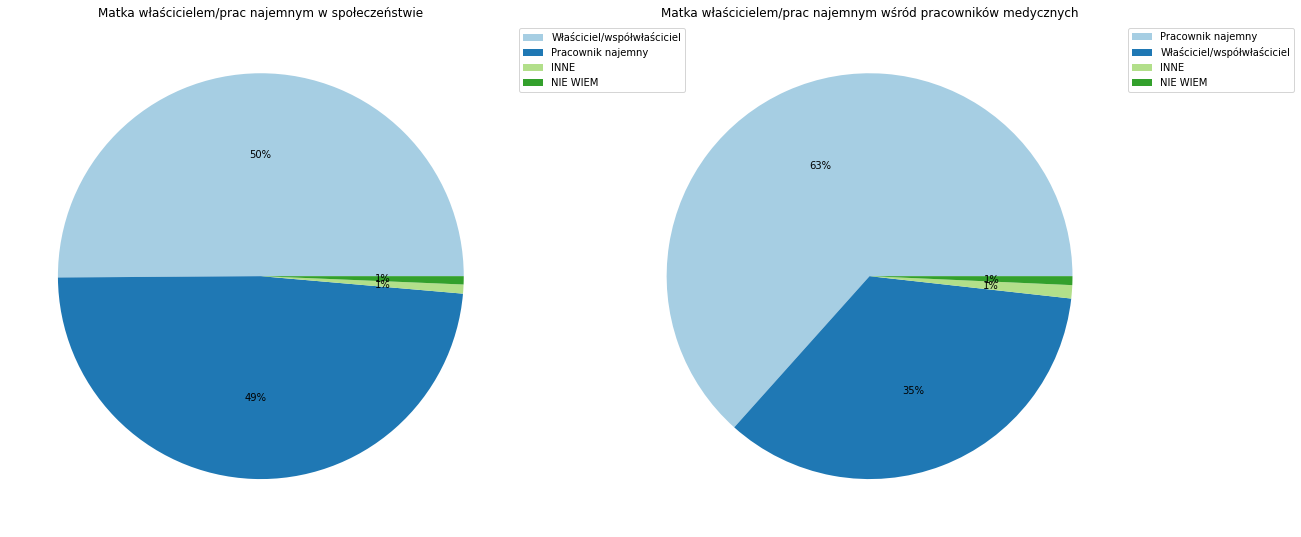

In [227]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
draw_profession_pie_chart(target_df, 'Matka właścicielem/prac najemnym', 5, axs=axs[0], title='Matka właścicielem/prac najemnym w społeczeństwie')
draw_profession_pie_chart(target_df[is_doctor(target_df)], 'Matka właścicielem/prac najemnym', 5, axs=axs[1], title='Matka właścicielem/prac najemnym wśród pracowników medycznych')
# draw_profession_pie_chart(target_df, 'Ojciec resp: wyznanie/religia', -1, axs=axs[1])b